<a href="https://colab.research.google.com/github/Naidala/OptimizationExercises/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from math import sqrt, log, ceil, sin
import numpy as np

def f(x):
  return (x-5)**2 + 3*np.sin(2*x)

#**Golden Section Search**
With a limited number of times to query a function *f(x)*, we can check whether *f(c)<f(d)* (or *f(c)>f(d)*) and shrink the bracketed interval to [a,d] (or [c,b] respectively).


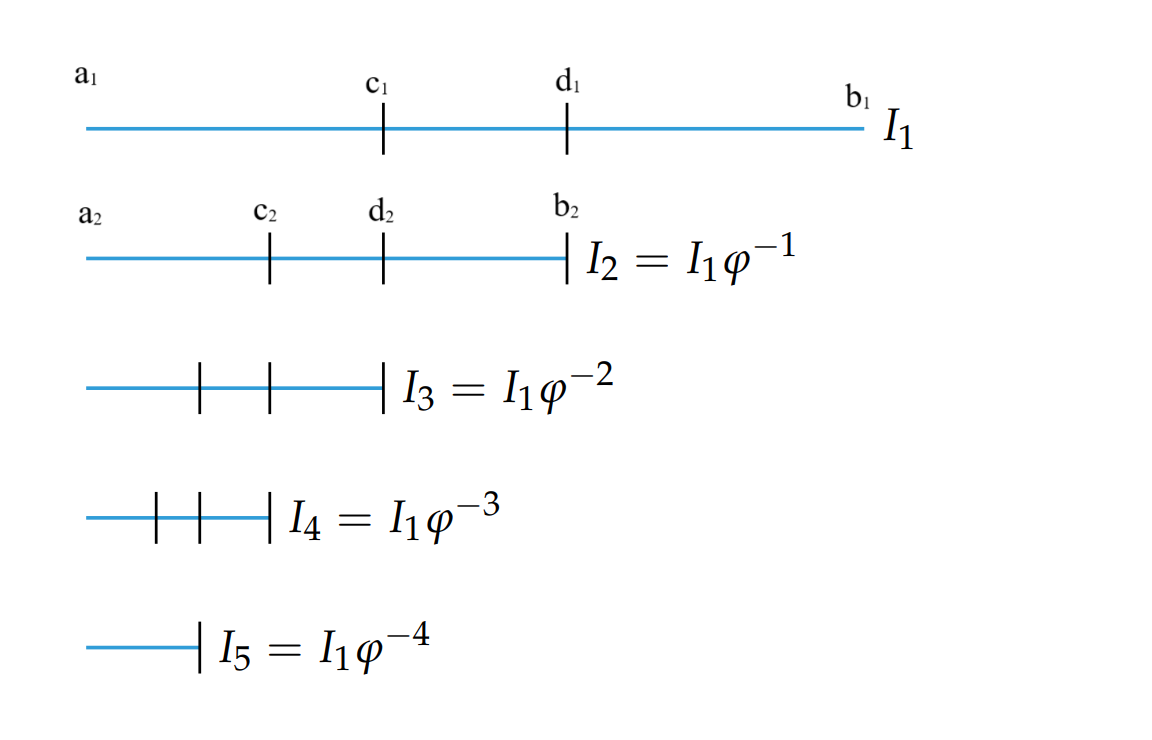

In [34]:
golden_ratio = (1 + sqrt(5))/2
invphi = 1/golden_ratio
invphi2 = invphi**2

def gss(f, a, b, tolerance=1e-5):
  c, d = a + (b-a) * invphi2, a + (b-a) * invphi

  steps = 0
  while (b - a) > tolerance:
    if f(c) < f(d):
      b, d = d, c
      c = a + (b-a)*invphi2

    else:
      a, c = c, d
      d = a + (b-a) * invphi

    steps += 1
  return (a + d)/2 if f(c) < f(d) else (c + b)/2, steps

#**Quadratic Fit Search**
Quadratic fit search iteratively fits a quadratic function to three
bracketing points, solves for the minimum, chooses a new set of bracketing points, and repeats. Tipically faster than Golden Search.

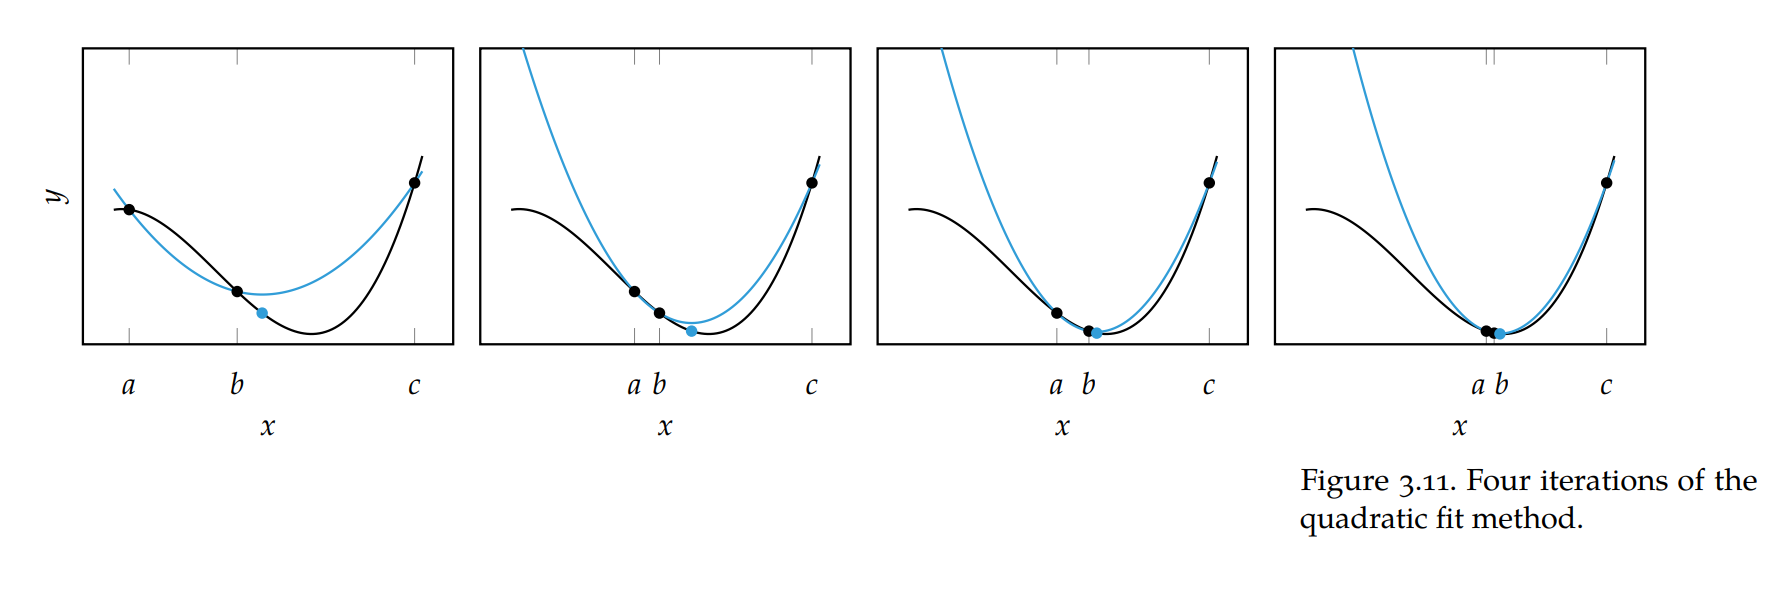

In [35]:
from numpy.linalg import inv
def qfs(f, a, b, c, tolerance=1e-5):
  steps = 0
  while (b - a) > tolerance or (c - b) > tolerance:
    fit_p_coeff = np.matmul(
      inv(np.array([
          [1, a, a**2],
          [1, b, b**2],
          [1, c, c**2]
      ], dtype='float64')),
      np.array([[f(a)], [f(b)], [f(c)]])
    )

    # solve the minimum for the quadratic fit q(x) = p_1 + p_2*x + p_3*x^2
    # the derivative is zero at x = -p_2/(2*p_3)
    x = (-fit_p_coeff[1]/(2*fit_p_coeff[2])).item() # fit minimum
    if x > b:
      if f(x) > f(b):
        c = x
      else:
        a, b, = b, x
    else:
      if f(x) > f(b):
        a = x
      else:
        c, b = b, x

    steps += 1
  return x, steps

#**COMPARISON**

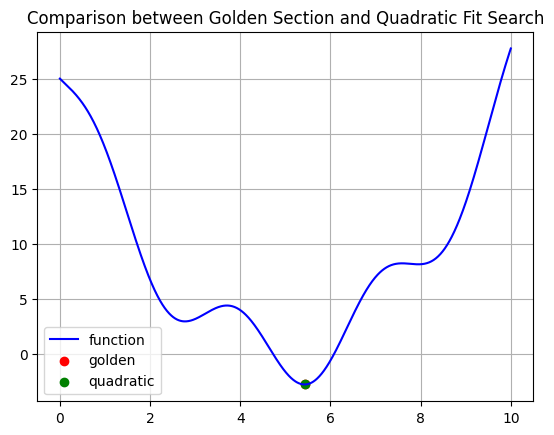

Minimum found by Golden Section Search in 29 steps: 5.4265
Minimum found by Quadratic Fit Search in 9 steps: 5.4265


In [36]:
import matplotlib.pyplot as plt

a, b = 0, 10    # interval of search for the minimum
golden_result, golden_steps = gss(f, a, b)
quad_a, quad_b, quad_c = a, (a+b)/2, b
quad_result, quad_steps = qfs(f, quad_a, quad_b, quad_c)

x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, color="blue")
plt.scatter([golden_result], [f(golden_result)], color="red")
plt.scatter([quad_result], [f(quad_result)], color="green")
plt.title("Comparison between Golden Section and Quadratic Fit Search")
plt.legend(['function', 'golden', 'quadratic'])
plt.grid(True)
plt.show()

# Risultati finali
print(f"Minimum found by Golden Section Search in {golden_steps} steps: {golden_result:.4f}")
print(f"Minimum found by Quadratic Fit Search in {quad_steps} steps: {quad_result:.4f}")